In [1]:
from IPython.display import Image
#While importing this is important to capitalize the I and P in IPython.
#if this is not done then this might be why there is an error


#Importing modules


import sys 
#this is used to manipulate variable and functions. 
#According to online resources this is helpful mostly for run time

import os
#This is useful when dealing with differnent directories in python.
##It can remove, change, or help accese directories

import glob
#This can be helpful when trying to return a file path that follows 
#a specific parttern

from os import listdir
#Shows a file or list of all files and directories that is in a working directory

from os import path
#I am not sure what this one does



#This is for arrays
import numpy as np
import pandas as pd

#For fit files and WCS objects
import astropy.units as u
from astropy.time import Time


#plotting and drawing modules

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns



#additional libraroes needed for AFINO

from scipy.io import readsav as idlsave

#import stats librarry

import scipy.stats as stats
import scipy.signal as sig

#This is the imports I used for AFINO
from afino import afino_start
from os import listdir
import json
import pandas as pd

In [2]:
def recrate(flx, h): 
    '''compue the difference formula for f'(a) with step size h.
    
    parameters 
    -----------
    flx : array that contains reconnection flux 
    h : contant cadance between observationss
    
    Returns
    ---------
    recreate: reconnection flux(a+h) - reconnection flux(a-h)/2h 
            [negative reconnection rates, posative reconnection rate]
    '''
    
    recreate  = np.zeros((2, len(flx[1,:])))
    
    nflux       = flx[2]
    pflux      = flx[0]
    recreate[0] = np.gradient(nflux, h, edge_order = 2)
    recreate[1] = np.gradient(pflux, h, edge_order = 2) 
    
    return recreate

In [3]:
def check(filename,bstr,wvstr):
    '''
    
    inputs: 
            filename -- name of the reconnection flux idl save file
            bstr     -- 
                        BLOS - normal component taken as the line of sight
                        BRAD - normal component taken as the radial magnatic field (B_r)
            wvstr    -- 
    output: 
            savname  -- full filename with extension of the reconnection flux
    '''
    for i in range(len(bstr)): 
        if path.exists(filename+bstr[i]+wvstr+".sav" ) == True:
            return  filename+bstr[i]+wvstr+".sav"
        else: 
            print('File not found!')
            

In [4]:
def extract_ribbon_vars(idlstrct):
    '''
    Written by Marcel
    Oct. 5, 2020
    Inputs  --
    Outputs --  OPTIONAL (*) 
                *dosday --?
                flx6 -- magnetic reconnection flux for pixel area with I >= median(I)*6
                flx8 -- magnetic reconnection flux for pixel area with I >= median(I)*8
                flx10 -- magnetic reconnection flux for pixel area with I >= median(I)*10
                * area6 --?
                * area8 --? 
                * area10 --?
                * ar_area --? 
                * mflx --?
                tim -- UTC time from HMI 
                * cut --? 
                * sathr --? 
                * str_brad --? 
                * tim_maxnegrecrate --?    
                * tim_maxposrecrate --?       
                * maxnegrecrate --?        
                * maxposrecrate --?         
                n_o_satpix -- number of saturated points for a given AIA image          
                * bcenx6 --?               
                * bceny6 --?             
                * bcenx8 --?            
                * bceny8 --?            
                * bcenx10 --?             
                * bceny10 --?            
                * dst6 --?                
                * dst8 --?               
                * dst10 --?               

                
    
    Extract all the idl variables 
    '''
    
    flx6                = idlstrct.flx6 
    flx8                = idlstrct.flx8
    flx10               = idlstrct.flx10 
    tim                 = list(idlstrct.tim) #object arrays are not suported by python  
    n_o_satpix          = idlstrct.n_o_satpix
    # These have been commented out because they are not used in the qpp analysis 
    dosday              = idlstrct.dosday
    area6               = idlstrct.area6 
    area8               = idlstrct.area8 
    area10              = idlstrct.area10 
    ar_area             = idlstrct.ar_area  
    mflx                = idlstrct.mflx
    cut                 = idlstrct.cut
    satthr              = idlstrct.satthr
    #dflxdt              = idlstrct.dflxdt
    str_brad            = idlstrct.str_brad

    tim_maxnegrecrate   = idlstrct.tim_maxnegrecrate 
    tim_maxposrecrate   = idlstrct.tim_maxposrecrate   
    maxnegrecrate       = idlstrct.maxnegrecrate
    maxposrecrate       = idlstrct.maxposrecrate 
    bcenx6              = idlstrct.bcenx6
    bceny6              = idlstrct.bceny6
    bcenx8              = idlstrct.bcenx8
    bceny8              = idlstrct.bceny8
    bcenx10             = idlstrct.bcenx10
    bceny10             = idlstrct.bceny10
    dst6                = idlstrct.dst6
    dst8                = idlstrct.dst8
    dst10               = idlstrct.dst10
    
    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
    #return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
    #return flx6,flx8,flx10,tim,n_o_satpix,area6,area8,area10,ar_area

In [5]:
def utc2jd(tim): 
    '''
    Written by Marcel 
    Oct. 2020
    
    Imput -- 
                tim -- UTC time from IDL sav file
    Output -- 
                jdt -- Julian days converted from UTC time  
                jst -- Julian days converted into seconds 
                js  -- Seconds from the start of the start date in Julian days
                to  -- Time Object dates in UTC-ISOT format
    '''
    jdt = list(np.zeros(len(tim)))
    jst = list(np.zeros(len(tim)))
    js  = list(np.zeros(len(tim)))
    sts = list(np.zeros(len(tim)))

    for i in range(len(tim)): 
        utcstr = str(tim[i])
        utcstr = utcstr.replace('b',"")
        utcstr = utcstr.replace("'",'') 
        sts[i] = utcstr #array to format date that is read by astropy
        jdt[i] = Time(utcstr,format='isot')
        jdt[i] = jdt[i].jd
        jst[i] = jdt[i] * 24 * 3600
        js[i]  = jst[i] - jst[0]
    jdt = np.array(jdt)
    jst = np.array(jst)
    js  = np.array(js)
    to  = Time(sts,scale='utc',format='isot') 
    return jdt,jst,js,to


In [6]:
def extract_RDB(flare_data):
    #extract all variables from RibbonDB IDL savefiles
    dosday,rdbflx8,rdbflx6,rdbflx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 =extract_ribbon_vars(flare_data)
    '''
    If you notice in the extract_ribbon_vars dflxdt is commented out. dflxdt is the calculation for the reconnection rate
    which I do later on in this code so it is not need in this instance.
    
    - dflxdt does not exist here 
    - also deleted from the return 
    '''
    
    #rdbflx6,rdbflx8,rdbflx10,tim,n_o_satpix,area6,area8,area10,ar_area = extract_ribbon_vars(flare_data)
    rdbflx = (rdbflx6+rdbflx10)/2 # reconnection flux in Maxwells
   
    #changes from utc to julian calander (in seconds; see ribbon_functions.py)
    _,_,rdbt,rdbtt = utc2jd(tim) #time is stored in a time stamp from year, month, day, etc...
    
    # Evaluate the reconnection rate
    #   negative recflux = rflx[0,:]    
    #   positive recflux = rflx[1,:]
    rdbrflx  = recrate(rdbflx,rdbt[1]-rdbt[0]) # reconnection rate 
                                               # in units of Maxwells per second
    
    #conversion of time to minutes
    rdbt = rdbt/60
       
    return rdbflx,rdbrflx,rdbt,rdbtt,dosday,rdbflx8,rdbflx6,rdbflx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10



In [7]:
Dir = "/Users/veronicaestrada/Downloads/Kazachenko/Comparisons/"

In [8]:
df = pd.read_csv("AFINO_Tabel_Com.csv" )

In [9]:
def binned_mode (var):
    
    '''
    Written by Veronica
    July 29 2023
    
    Mode is not always acurate so to try to fix this issue I am going
    define another function that will accurately calculate the mode
    '''
    var = var[np.isnan(var)==False] #This gets rid of the nan values
    
    
    binned = np.histogram(var, bins = 10) 
    mode   = ((binned[1][1:]+binned[1][0:-1])/2)[np.argmax(binned[0])]
    
    return mode

           

In [105]:
def compare_PandN_var (pvar_1, pvar_2, nvar_1,nvar_2, name_var_1, name_var_2):
    
    '''
    Written by Veronica
    July 31, 2023
    
    The purpose of this code is to allow anyone to plug in any arrays that will be compared against
    one another.
    
    If the variables are within a CSV then they must be first extracted from the CSV and then plugged into the
    funtion
    
    Input -> Variable 1 Vs. Variable 2
    
    The pvar_1 and pvar_2 are the two variables you are trying to compare but they are
    both positive. THen it will compare the negatives with nvar_1 and nvar_2. 
    
    name_var_1 = string
    name_var_2 = string
    var_1      = array 1
    var_2      = array 2
    plotdir      = a path to where you want to save plots
    
    Output -> Mode, Mean, Standard Deviation, Scew, Kurtosis
    
    TODO.---- add a scaled vertio of the values to make a nice histogram of the two objects'''
    
    ######## Positive ######
    
    ######## Mean ########
    Pmean1 = np.mean(pvar_1)
    Pmean2 = np.mean(pvar_2)
    
    ###### Standard Deviation ########
    Pstd1 = np.std(pvar_1)
    Pstd2 = np.std(pvar_2)
    
    
    ####### Skew #########
    Pskew1 = stats.skew(pvar_1)
    Pskew2 = stats.skew(pvar_2)
    
    
    ##### Kurtosis #########
    Pkur1 = stats.kurtosis(pvar_1)
    Pkur2 = stats.kurtosis(pvar_2)
    
    
    ####### Mode #########
    
    Pbmode_1 = binned_mode(pvar_1)
    Pbmode_2 = binned_mode(pvar_2)
    
    ####### Loading ##########
    
    ######## Nevgative #######
    
    ######## Mean ########
    Nmean1 = np.mean(nvar_1)
    Nmean2 = np.mean(nvar_2)
    
    ###### Standard Deviation ########
    Nstd1 = np.std(nvar_1)
    Nstd2 = np.std(nvar_2)
    
    
    ####### Skew #########
    Nskew1 = stats.skew(nvar_1)
    Nskew2 = stats.skew(nvar_2)
    
    
    ##### Kurtosis #########
    Nkur1 = stats.kurtosis(nvar_1)
    Nkur2 = stats.kurtosis(nvar_2)
    
    
    ####### Mode #########
    
    Nbmode_1 = binned_mode(nvar_1)
    Nbmode_2 = binned_mode(nvar_2)
    
    ####### Loading ##########
    
    
    fig,ax = plt.subplots(ncols = 2, nrows = 1, figsize = (30,7))
    ax1 = ax[0]
    ax2 = ax[1]
    ####### Histograms #######

    ax1.hist(pvar_1 ,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Negative')
    ax1.hist(nvar_1,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Positive')
    ax1.set_ylabel('Count',fontsize = 15)
    ax1.set_xlabel(name_var_1,fontsize = 15)
    ax1.set_title(name_var_1,fontsize = 20)
    ax1.legend(fontsize = 15)
    
    
    
    ax1.hist(nvar_2 ,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Negative')
    ax1.hist(pvar_2,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Positive')
    ax1.set_ylabel('Count',fontsize = 15)
    ax1.set_xlabel(name_var_2,fontsize = 15)
    ax1.set_title(name_var_2,fontsize = 20)
    ax1.legend(fontsize = 15)
    
    
    
    ######### Scatter Plots ########
    
    
    ax2.scatter(pvar_1, pvar_2, marker = "D",label = 'Positive')
    ax2.scatter(nvar_1, nvar_2, label = 'Negative')
    ax2.set_xlabel(name_var_1,fontsize = 15)
    ax2.set_ylabel(name_var_2,fontsize = 15)
    ax2.legend(fontsize = 15)
    ax2.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
    ax2.set_title(name_var_1 +' Vs. '+ name_var_2,fontsize = 20)
    
    
    ########linear fit#########
    
    p_slope, p_intercept, p_r, p_p, p_se = stats.linregress(pvar_1, pvar_2)
    n_slope, n_intercept, n_r, n_p, n_se = stats.linregress(nvar_1, nvar_2)
    
    
    plt.scatter(pvar_1, pvar_2, marker = "D")
    plt.plot(pvar_1, p_intercept + p_slope * pvar_1, 'b', label='Pos Lin fit')
    plt.scatter(nvar_1, nvar_2)
    plt.plot(nvar_1, n_intercept + n_slope*nvar_1, 'b', label='Neg Lin fit')
    plt.xlabel(name_var_1,fontsize = 15)
    plt.ylabel(name_var_2,fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
    plt.title(name_var_1 +' Vs. '+name_var_2,fontsize = 20) ## I want this to say " var1 Vs. "
    plt.show()
    
    return Pstd1,Pstd2,Pskew1,Pskew2,Pkur1,Pkur2,Pbmode_1,Pbmode_2,Nstd1,Nstd2,Nmean1,Nmean2,Nskew1,Nskew2,Nkur1,Nkur2,Nbmode_1,Nbmode_2
    
    

In [106]:
def compare_periods_var (period1, period2, period3,var1,var1_scaled, name_var1, name_period1, name_period2, name_period3, flag = True):
    
    '''
    Written by Veronica
    Aug 4, 2023
    
    The purpose of this code is to allow anyone to plug in three set of periods (mean, mode, AFINO
    to compare against other variables.
    
    If the variables are within a CSV then they must be first extracted from the CSV and then plugged into the
    funtion
    
    Input -> mean period, mode period, Afino Period, and Variable 1
    
    You will have to compare the posative and negative variables seperately 
    
    name_var_1 = string
    name_period1 = string
    name_period2 = string
    name_period3 = string
    var_1        = array 1
    period1      = array 2
    period2      = array 3
    period3      = array 4
    
    plotdir      = a path to where you want to save plots
    
    Output -> Mode, Mean, Standard Deviation, Scew, Kurtosis, spearman, and pearson
    
    Note: The pearson and the spearman corraltion has the p-values associated with it.
    
    TODO Histograms with the graphs'''
    
    ######## Positive ######
    
    ######## Mean ########
    Per_mean1 = np.mean(period1)
    Per_mean2 = np.mean(period2)
    Per_mean3 = np.mean(period3)
    Var_mean1 = np.mean(var1)
    
    ###### Standard Deviation ########
    Per_std1 = np.std(period1)
    Per_std2 = np.std(period2)
    Per_std3 = np.std(period3)
    Var_std1 = np.std(var1)
    
    
    ####### Skew #########
    Per_skew1 = stats.skew(period1)
    Per_skew2 = stats.skew(period2)
    Per_skew3 = stats.skew(period3)
    Var_skew1 = stats.skew(var1)
    
    
    ##### Kurtosis #########
    Per_kur1 = stats.kurtosis(period1)
    Per_kur2 = stats.kurtosis(period2)
    Per_kur3 = stats.kurtosis(period3)
    Var_kur1 = stats.kurtosis(var1)

    
    
    ####### Mode #########
    
    Per_mode1 = binned_mode(period1)
    Per_mode2 = binned_mode(period2)
    Per_mode3 = binned_mode(period3)
    Var_mode1 = binned_mode(var1)
    
    
    #### Spearman ###########
    spear_period1,pvalue_spear1 = stats.spearmanr(var1,period1)
    spear_period2,pvalue_spear2 = stats.spearmanr(var1,period2)
    spear_period3,pvalue_spear3 = stats.spearmanr(var1,period3)
    
    
    #### Pearson ############
    
    #pearson_period1,pvalue_pearson1 = stats.pearsonr(var1,period1)
    #pearson_period2,pvalue_pearson1 = stats.pearsonr(var1,period2)
    #pearson_period3,pvalue_pearson1 = stats.pearsonr(var1,period2)
    
    ####### Make sure to add the istograms for the variables. ##########
    
    if flag:
        
        fig,ax = plt.subplots(ncols = 3, nrows = 1, figsize = (30,7))
        ax1 = ax[0]
        ax2 = ax[1]
        ax3 = ax[2]
        ####### Histograms #######
        ax1.hist(var1_scaled,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_var1, color = 'green')
        ax1.hist(period1,bins = 10,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period1, color = 'blue' )
        ax1.hist(period2,bins = 10,histtype = 'step',linewidth = 2, zorder = 0,alpha = 1, label = name_period2, color = 'red')
        ax1.hist(period3,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period3, color = 'green')
        ax1.set_xlabel('QPP Periods (min)',fontsize = 15)
        ax1.set_ylabel('Frequencey',fontsize = 15)
        ax1.legend(fontsize = 15)
        ax1.set_title("Periods(min)",fontsize = 20) ## I want this to say " var1 Vs. "
        
    
        ######### Scatter Plots ########
    
        ax2.scatter(var1, period1,label = name_period1, marker = "D")
        ax2.scatter(var1, period2,label = name_period2)
        ax2.scatter(var1, period3,label = name_period3)
        ax2.set_xlabel(name_var1,fontsize = 15)
        ax2.set_ylabel('Periods (min)',fontsize = 15)
        ax2.legend(fontsize = 15)
        ax2.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
        ax2.set_title(name_var1 +' Vs. Periods',fontsize = 20)
        
        
        ######### Log Plot ##############
        ax3.loglog(var1,period1,'o',label = name_period1, marker = "D")
        ax3.loglog(var1,period2,'o',label = name_period2)
        ax3.loglog(var1,period3,'o',label = name_period3)
        ax3.set_xlabel(name_var1,fontsize = 15)
        ax3.set_ylabel('Periods (min)',fontsize = 15)
        ax3.legend(fontsize = 15)
        ax3.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
        ax3.set_title(name_var1 + ' Vs. Periods',fontsize = 20)
        
        
    else:
        
        fig,ax = plt.subplots(ncols = 2, nrows = 1, figsize = (30,7))
        ax1 = ax[0]
        ax2 = ax[1]

        ####### Histograms #######

        ax1.hist(var1_scaled,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_var1, color = 'green')
        ax1.hist(period1,bins = 10,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period1, color = 'blue' )
        ax1.hist(period2,bins = 10,histtype = 'step',linewidth = 2, zorder = 0,alpha = 1, label = name_period2, color = 'red')
        ax1.hist(period3,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period3, color = 'green')
        ax1.set_xlabel('QPP Periods (min)',fontsize = 15)
        ax1.set_ylabel('Frequencey',fontsize = 15)
        ax1.legend(fontsize = 15)
        ax1.set_title("Periods(min)",fontsize = 20) ## I want this to say " var1 Vs. "
    
        ######### Scatter Plots ########
    
        ax2.scatter(var1, period1,label = name_period1, marker = "D")
        ax2.scatter(var1, period2,label = name_period2)
        ax2.scatter(var1, period3,label = name_period3)
        ax2.set_xlabel(name_var1,fontsize = 15)
        ax2.set_ylabel('Periods (min)',fontsize = 15)
        ax2.legend(fontsize = 15)
        ax2.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
        ax2.set_title(name_var1 +' Vs. Periods',fontsize = 20)
        
    
    
    
    return Per_mean1, Per_mean2, Per_mean3, Var_mean1, Per_std1, Per_std2, Per_std3, Var_std1, Per_skew1, Per_skew2, Per_skew3,Var_skew1, Per_kur1,Per_kur2, Per_kur3, Var_kur1, Per_mode1, Per_mode2, Per_mode3,Var_mode1,spear_period1,pvalue_spear1,spear_period2,pvalue_spear2,spear_period3,pvalue_spear3  

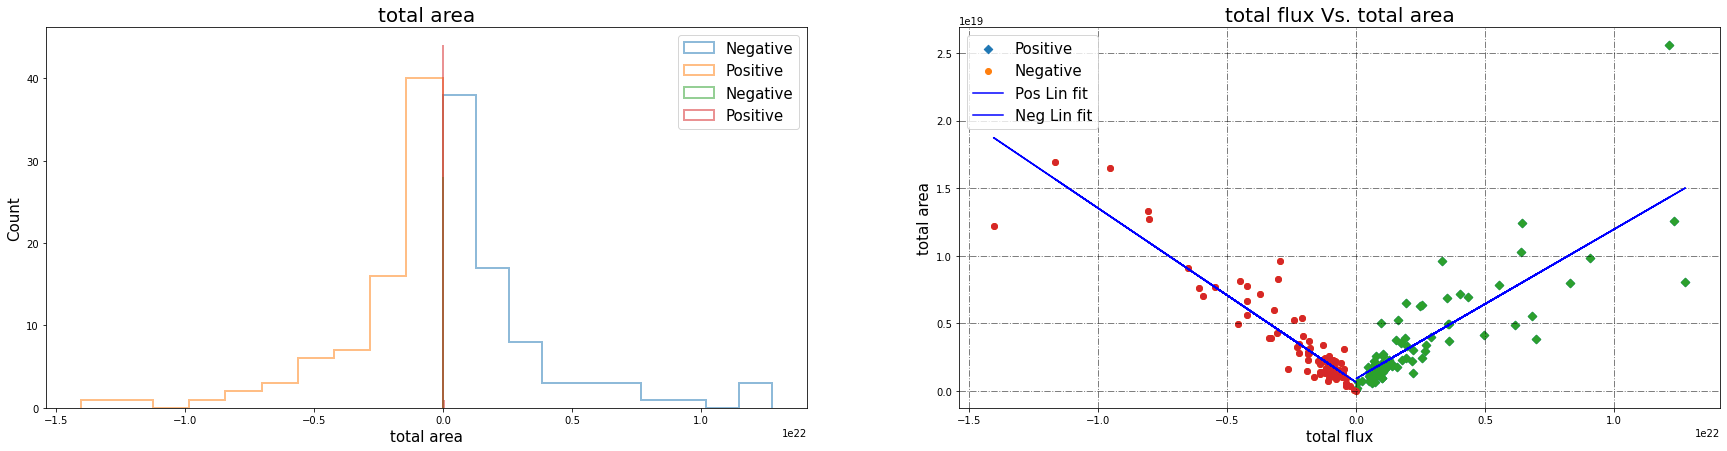

In [107]:
df = pd.read_csv("AFINO_Tabel_Com.csv")
tot_pflux = df["total_pflux"]
tot_nflux = df["total_nflux"]
tot_parea = df["total_parea"]
tot_parea_scaled = df["total_parea"]/1e19
tot_narea = df["total_narea"]
pafino_period = df["QPP_Period_P"]
pmean_period  = df["Pmean"]
pmode_period  = df["Pmode_Period"]
Tot_AR_pArea  = df["total_ar_parea"]
Tot_AR_nArea  = df["total_ar_narea"]
maxnegrecrate = df['maxnegrecrate']
maxposrecrate = df['maxposrecrate']

maxnegrecrate

Pstd1,Pstd2,Pskew1,Pskew2,Pkur1,Pkur2,Pbmode_1,Pbmode_2,Nstd1,Nstd2,Nmean1,Nmean2,Nskew1,Nskew2,Nkur1,Nkur2,Nbmode_1,Nbmode_2 = compare_PandN_var(tot_pflux,tot_parea,tot_nflux,tot_narea,'total flux','total area')
    


In [108]:
type(maxnegrecrate)

pandas.core.series.Series

/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_22822/1041494876.py:116: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax3.loglog(var1,period1,'o',label = name_period1, marker = "D")


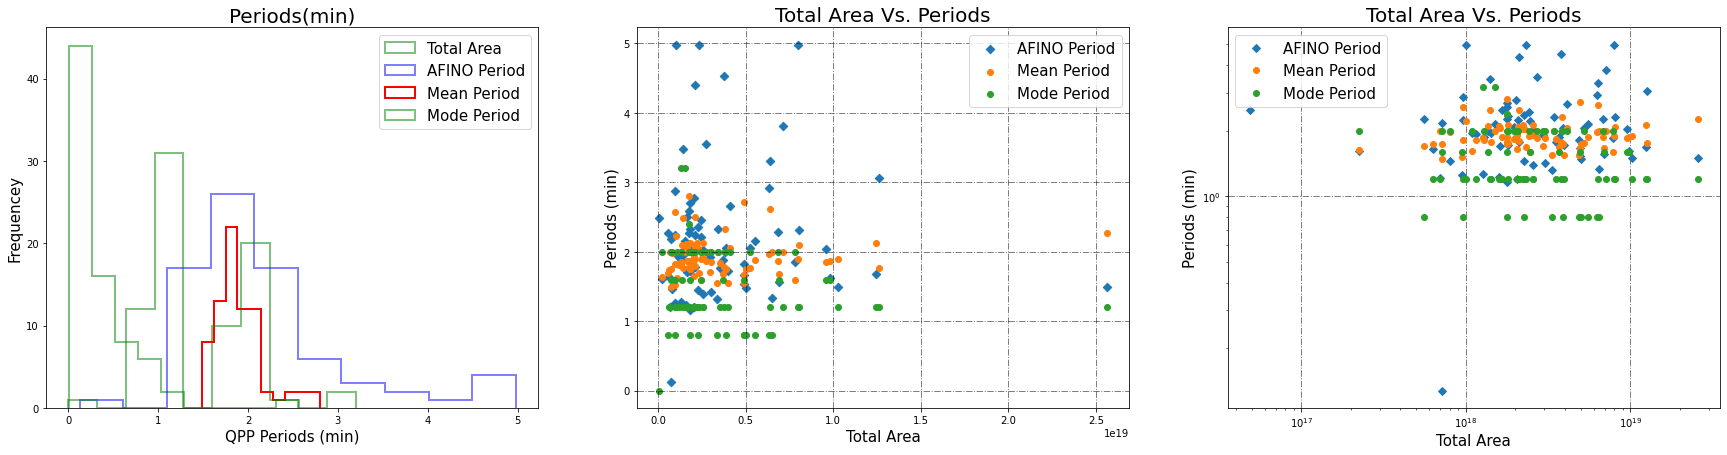

In [109]:


Per_mean1, Per_mean2, Per_mean3, Var_mean1, Per_std1, Per_std2, Per_std3, Var_std1, Per_skew1, Per_skew2, Per_skew3,Var_skew1, Per_kur1,Per_kur2, Per_kur3, Var_kur1, Per_mode1, Per_mode2, Per_mode3,Var_mode1,spear_period1,pvalue_spear1,spear_period2,pvalue_spear2,spear_period3,pvalue_spear3   = compare_periods_var (pafino_period, pmean_period, pmode_period,tot_parea,tot_parea_scaled, 'Total Area', 'AFINO Period', 'Mean Period', 'Mode Period')

0.06087413736444299 0.5989441540991185


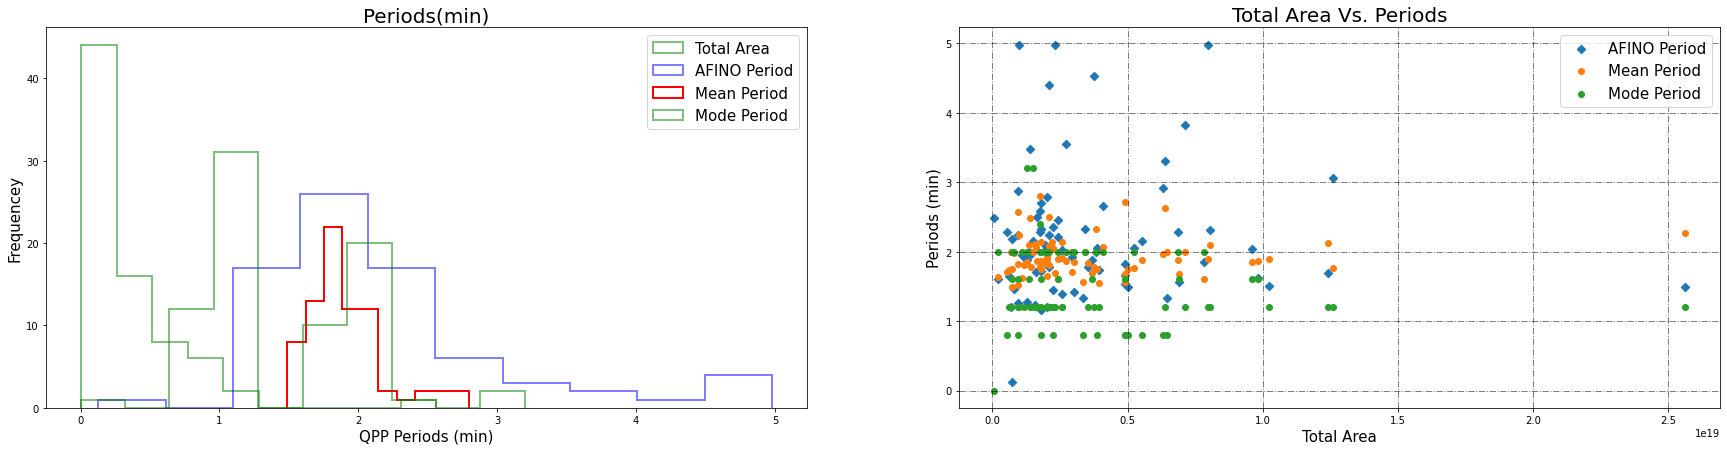

In [110]:


Per_mean1, Per_mean2, Per_mean3, Var_mean1, Per_std1, Per_std2, Per_std3, Var_std1, Per_skew1, Per_skew2, Per_skew3,Var_skew1, Per_kur1,Per_kur2, Per_kur3, Var_kur1, Per_mode1, Per_mode2, Per_mode3,Var_mode1,spear_period1,pvalue_spear1,spear_period2,pvalue_spear2,spear_period3,pvalue_spear3   = compare_periods_var (pafino_period, pmean_period, pmode_period,tot_parea,tot_parea_scaled, 'Total Area', 'AFINO Period', 'Mean Period', 'Mode Period',False)
print(spear_period1,pvalue_spear1)

In [ ]:
nafino_period = df["QPP_Period_N"]
nmean_period  = df["Nmean"]
nmode_period  = df["Nmode_Period"]



nPer_mean1, nPer_mean2, nPer_mean3, nVar_mean1, nPer_std1, nPer_std2, nPer_std3, nVar_std1, nPer_skew1, nPer_skew2, nPer_skew3,nVar_skew1, nPer_kur1,nPer_kur2, nPer_kur3, nVar_kur1, nPer_mode1, nPer_mode2, nPer_mode3,nVar_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period,tot_narea, 'Total Area Ribbon', 'AFINO Period', 'Mean Period', 'Mode Period', True)


In [ ]:
# binned_mode (pmean_period)

In [ ]:
#pmean_period

In [ ]:
#print(len (pmean_period))
#print(len(pmean_period[np.isnan(pmean_period)]))

In [ ]:
#print(len(pmean_period[np.isnan(pmean_period)==False]))

In [ ]:
#print(pmean_period[np.isnan(pmean_period)==False])

In [ ]:
#for i in range (len (pmean_period)):
 #   print(pmean_period[i][np.isnan(pmean_period[i])==False])


In [ ]:
nPer_mean1, nPer_mean2, nPer_mean3, nVar_mean1, nPer_std1, nPer_std2, nPer_std3, nVar_std1, nPer_skew1, nPer_skew2, nPer_skew3,nVar_skew1, nPer_kur1,nPer_kur2, nPer_kur3, nVar_kur1, nPer_mode1, nPer_mode2, nPer_mode3,nVar_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period,tot_pflux, 'Total Positive Flux', 'AFINO Period', 'Mean Period', 'Mode Period', True)
##Add units to the plots 

In [ ]:
nPer_mean1, nPer_mean2, nPer_mean3, nflux_mean1, nPer_std1, nPer_std2, nPer_std3, nflux_std1, nPer_skew1, nPer_skew2, nPer_skew3,nflux_skew1, nPer_kur1,nPer_kur2, nPer_kur3, nflux_kur1, nPer_mode1, nPer_mode2, nPer_mode3,nflux_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period,tot_nflux, 'Total Negative Flux', 'AFINO Period', 'Mean Period', 'Mode Period', True)


In [ ]:
nPer_mean1, nPer_mean2, nPer_mean3, pARAre_mean1, nPer_std1, nPer_std2, nPer_std3, pARArea_std1, nPer_skew1, nPer_skew2, nPer_skew3,pARArea_skew1, nPer_kur1,nPer_kur2, nPer_kur3, pARArea_kur1, nPer_mode1, nPer_mode2, nPer_mode3,pARArea_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period,Tot_AR_pArea, 'Total Positive AR Area', 'AFINO Period', 'Mean Period', 'Mode Period', True)


In [ ]:
nPer_mean1, nPer_mean2, nPer_mean3, nARArea_mean1, nPer_std1, nPer_std2, nPer_std3, nARArea_std1, nPer_skew1, nPer_skew2, nPer_skew3,nARArea_skew1, nPer_kur1,nPer_kur2, nPer_kur3, nARArea_kur1, nPer_mode1, nPer_mode2, nPer_mode3,nARArea_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period,Tot_AR_nArea, 'Total Negative AR Area', 'AFINO Period', 'Mean Period', 'Mode Period', True)


In [ ]:
nPer_mean1, nPer_mean2, nPer_mean3, nmax_mean1, nPer_std1, nPer_std2, nPer_std3, nmax_std1, nPer_skew1, nPer_skew2, nPer_skew3,nmax_skew1, nPer_kur1,nPer_kur2, nPer_kur3, nmax_kur1, nPer_mode1, nPer_mode2, nPer_mode3,nmax_mode1  = compare_periods_var (nafino_period,nmean_period, nmode_period, maxnrecrate_float, 'Max Negative Recrate', 'AFINO Period', 'Mean Period', 'Mode Period', False)


In [ ]:
maxnegrecrate.shape


In [ ]:
float(maxnegrecrate[0][1:-1])

In [ ]:
float(maxnegrecrate[0])

In [ ]:
maxnrecrate_float = np.zeros(len(maxnegrecrate))
for i in range(len(maxnegrecrate)):
    maxnrecrate_float[i] = float(maxnegrecrate[i][1:-1])
    
    

In [ ]:
maxnrecrate_float